# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [84]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


# Importing data

In [85]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
#url = Ruta + "datasets/iris/iris.csv"

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )

dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [86]:
print(dataset.shape)
dataset.head(5)

(150, 5)


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


2. Drop rows with any missing values


In [87]:
dataset.isnull().sum()

#No hay valores faltantes

,0
Sepal_Length,0
Sepal_Width,0
Petal_Length,0
Petal_Width,0
Flower,0


3. Encoding the class label categorical column: from string to num


In [88]:
# Encoding the categorical column {"Iris-setosa":1, "Iris-versicolor":2, "Iris-virginica":3}
dataset = dataset.replace({"Flower":  {"Iris-setosa":1, "Iris-versicolor":2, "Iris-virginica":3} })
#Visualize the dataset
dataset

<ipython-input-88-10956326544e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace({"Flower":  {"Iris-setosa":1, "Iris-versicolor":2, "Iris-virginica":3} })


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


Now the label/category is numeric


4. Discard columns that won't be used


In [89]:
# If necesary, drop out non necesary columns


5. Scatter plot of the data

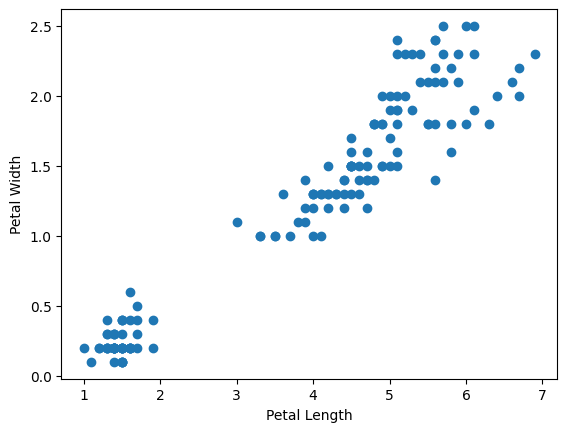

In [90]:
plt.scatter(dataset.Petal_Length,dataset.Petal_Width)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

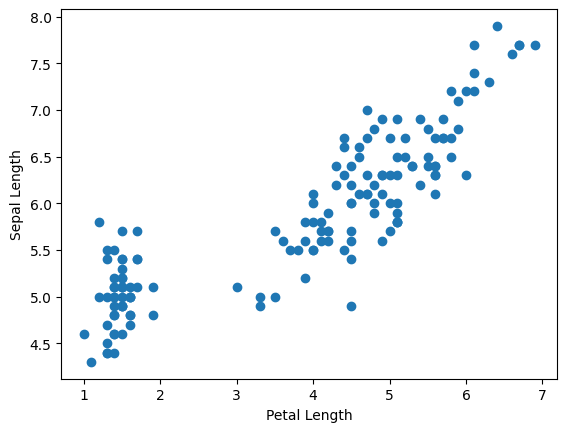

In [91]:
plt.scatter(dataset.Petal_Length,dataset.Sepal_Length)
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.show()

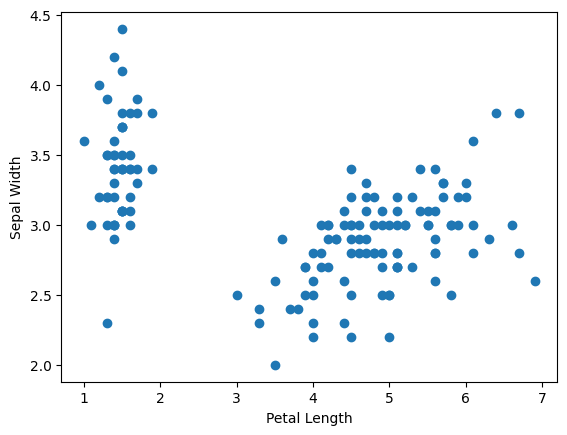

In [92]:
plt.scatter(dataset.Petal_Length,dataset.Sepal_Width)
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.show()

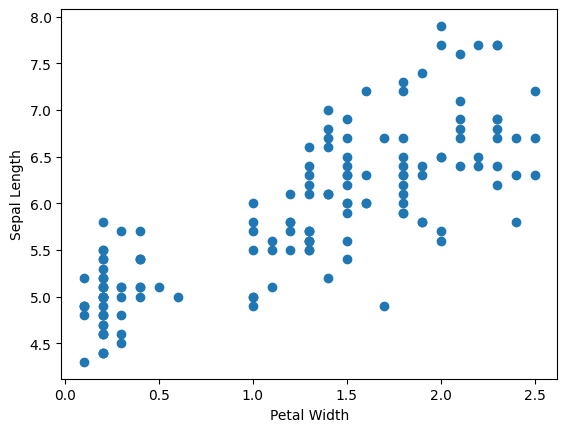

In [93]:
plt.scatter(dataset.Petal_Width,dataset.Sepal_Length)
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.show()

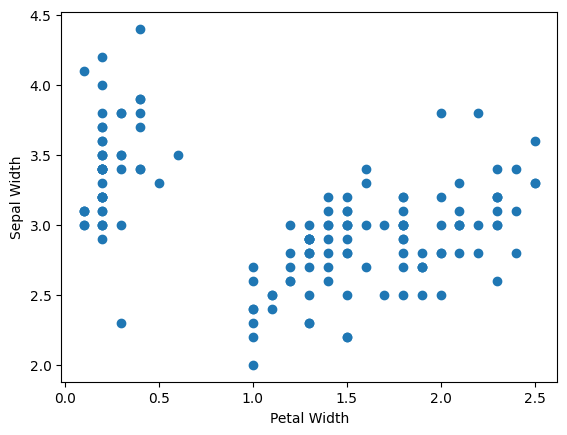

In [94]:
plt.scatter(dataset.Petal_Width,dataset.Sepal_Width)
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.show()

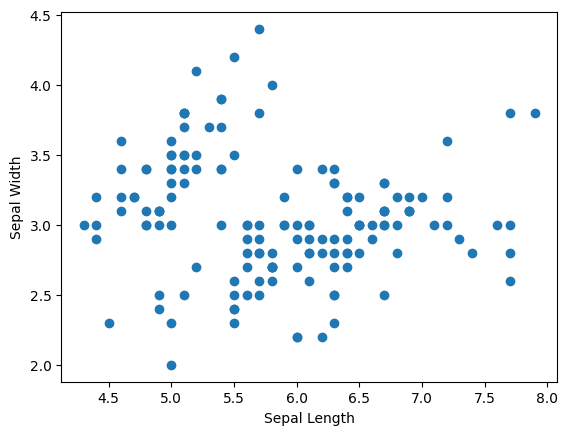

In [95]:
plt.scatter(dataset.Sepal_Length,dataset.Sepal_Width)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

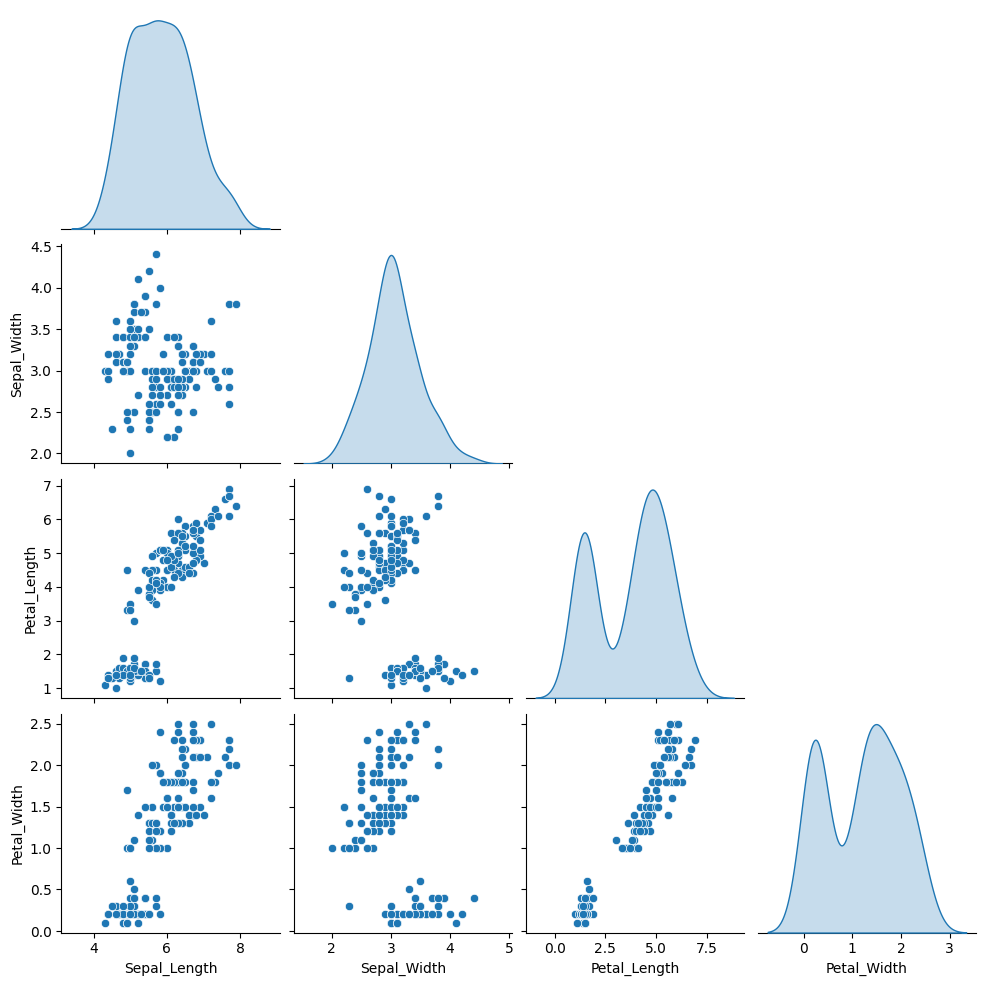

In [96]:
# Pairplot: Scatterplot of all variables
g = sns.pairplot(dataset[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']], corner=True, diag_kind="kde")
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

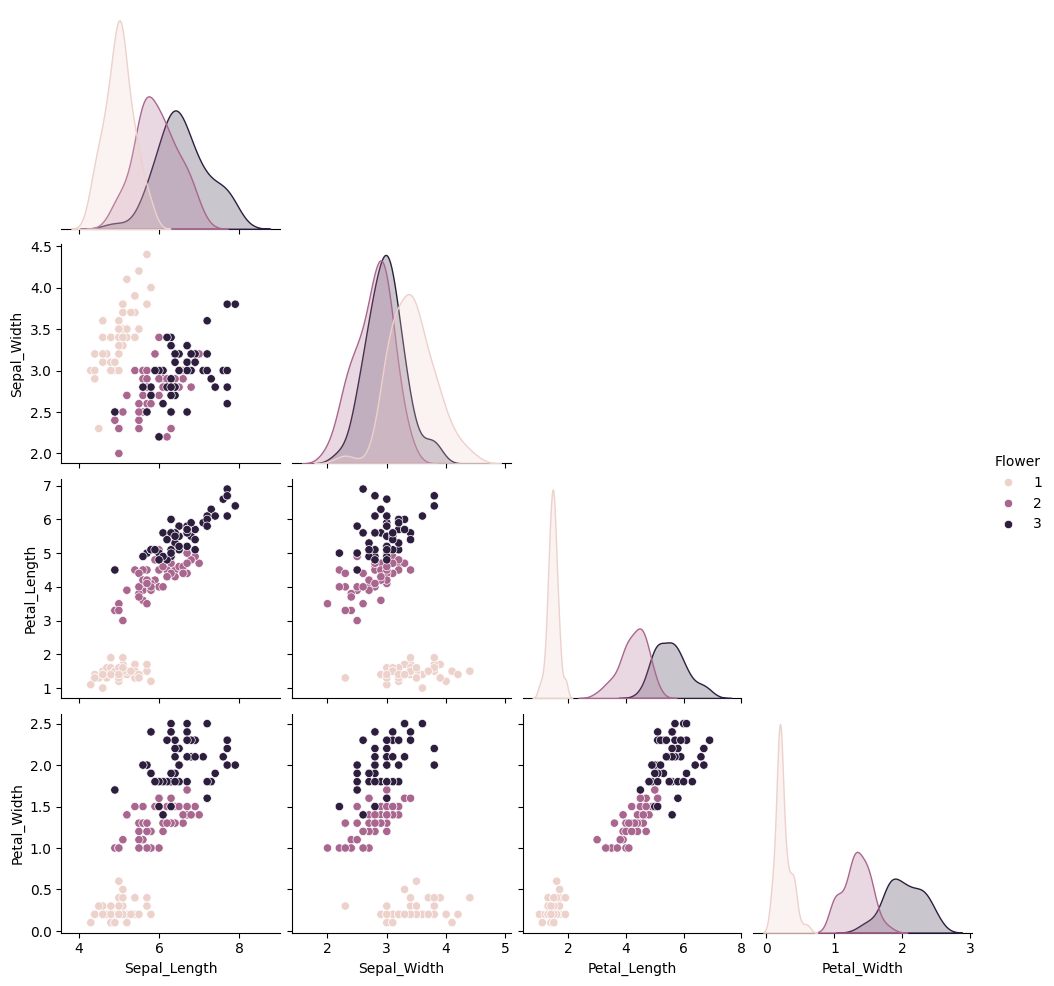

In [97]:
# Get dataframes for each real cluster

ds1 = dataset[dataset.Flower==1]
ds2 = dataset[dataset.Flower==2]
ds3 = dataset[dataset.Flower==3]

g = sns.pairplot(dataset, corner=True, diag_kind="kde", hue='Flower')
plt.show()

Recall that for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [98]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km = KMeans(n_clusters=3, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster)
Cluster = km.fit_predict(dataset[['Petal_Length','Petal_Width']] )

# Print estimated cluster of each point in the dataset
Cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [99]:
dataset.Flower.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [100]:
print("True: ",(((dataset.Flower==Cluster)==True)).sum())
print("False: ",(((dataset.Flower==Cluster)==False)).sum())

True:  52
False:  98


NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [101]:
# Manual pairing the labels of the real and estimated clusters
ClusterPaired = np.choose(Cluster, [2, 0, 1]).astype(int) # CHANGE USING THE ORDER THE LABEL ESTIMATED
ClusterPaired

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [102]:
# Add a new column to the dataset with the cluster information
dataset['Cluster'] = ClusterPaired
dataset

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower,Cluster
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3,1
146,6.3,2.5,5.0,1.9,3,1
147,6.5,3.0,5.2,2.0,3,1
148,6.2,3.4,5.4,2.3,3,1


In [106]:
# Label of the estimated clusters
dataset.Cluster.unique()

array([0, 2, 1])

In [107]:
# Cluster centroides
km.cluster_centers_


array([[4.29259259, 1.35925926],
       [1.464     , 0.244     ],
       [5.62608696, 2.04782609]])

In [108]:
# Sum of squared error (sse) of the final model
km.inertia_

31.42928566827697

In [109]:
# The number of iterations required to converge
km.n_iter_

7

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters

Plot estimated clusters

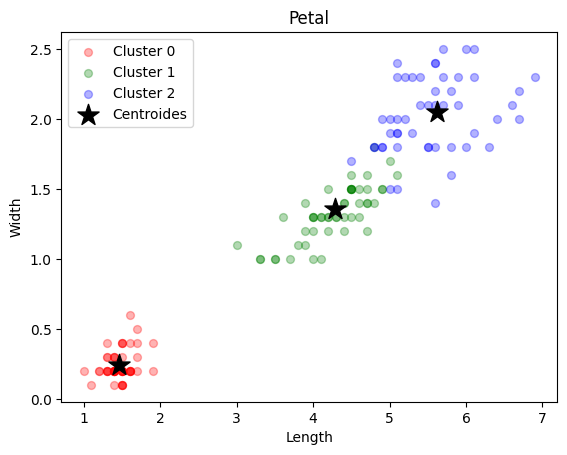

In [111]:
plt.scatter(ds1.Petal_Length, ds1.Petal_Width, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(ds2.Petal_Length, ds2.Petal_Width, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(ds3.Petal_Length, ds3.Petal_Width, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()

## Plot both real and estimated clusters to check for errors

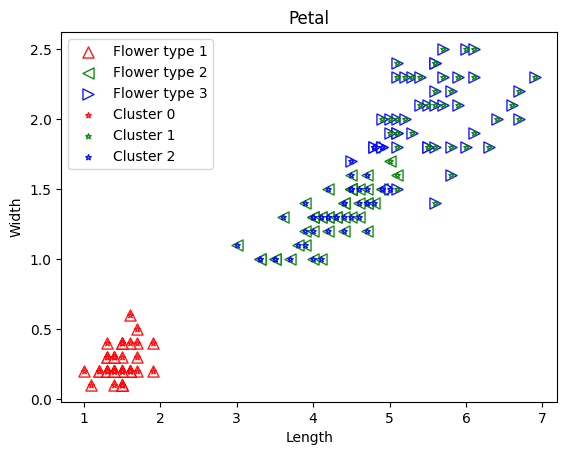

In [115]:
plt.scatter(ds1.Petal_Length, ds1.Petal_Width, label='Flower type 1', c='white', edgecolor='r', marker='^', s=64, alpha=0.9)
plt.scatter(ds2.Petal_Length, ds2.Petal_Width, label='Flower type 2', c='white', edgecolor='g', marker='<', s=64, alpha=0.9)
plt.scatter(ds3.Petal_Length, ds3.Petal_Width, label='Flower type 3', c='white', edgecolor='b', marker='>', s=64, alpha=0.9)

cluster1=dataset[dataset.Cluster==0]
cluster2=dataset[dataset.Cluster==1]
cluster3=dataset[dataset.Cluster==2]

plt.scatter(cluster1.Petal_Length, cluster1.Petal_Width, label='Cluster 0',      c='white', edgecolor='r', marker='*', s=16, alpha=0.9)
plt.scatter(cluster2.Petal_Length, cluster2.Petal_Width, label='Cluster 1',      c='white', edgecolor='g', marker='*', s=16, alpha=0.9)
plt.scatter(cluster3.Petal_Length, cluster3.Petal_Width, label='Cluster 2',      c='white', edgecolor='b', marker='*', s=16, alpha=0.9)

plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()


<span style='color:Blue'> **Important remarks**  </span>

- Note that for K=2 ...
- Note that for K=3 ...
- Note that for K=4 ...

Concluir

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [116]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(dataset[['Petal_Length','Petal_Width']])
    # Save sse for each k
    sse.append(km.inertia_)


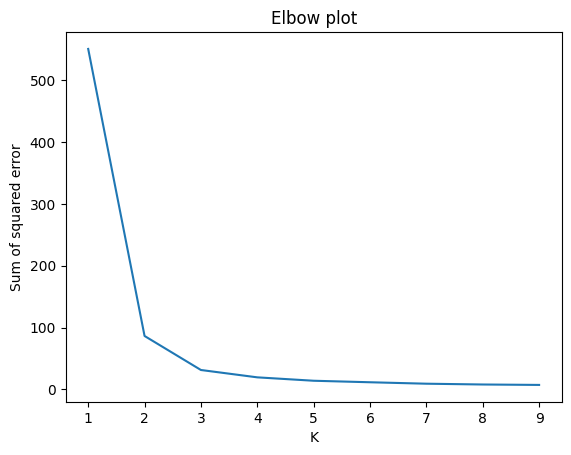

In [117]:
# Plot sse versus k
plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

Choose the k after which the sse is minimally reduced


In [ ]:
# k = 3

# Final remarks

- The number of each cluster need to be assigned assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k